In [ ]:
#Gerekli kütüphaneler yüklendi.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [116]:
#Veri kümesi (dataset) yüklendi.
#https://www.kaggle.com/datasets/boltcutters/food-allergens-and-allergies
df = pd.read_csv('FoodData.csv')

In [117]:
#Görselleştirme için teyit edildi.
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()


In [118]:
#Eksik değerler kontrol edildi.
print("\n Eksik değerlerin sayısı:")
print(df.isnull().sum())


 Eksik değerlerin sayısı:
class       0
type        0
group       0
food        0
allergy    22
dtype: int64


In [ ]:
#Eksik değerler dolduruldu.
#Sayısal sütunlar için
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

#Kategorik sütunlar için
categorical_columns = df.select_dtypes(include=['object']).columns
df.update(df[categorical_columns].fillna("Bilinmiyor"))

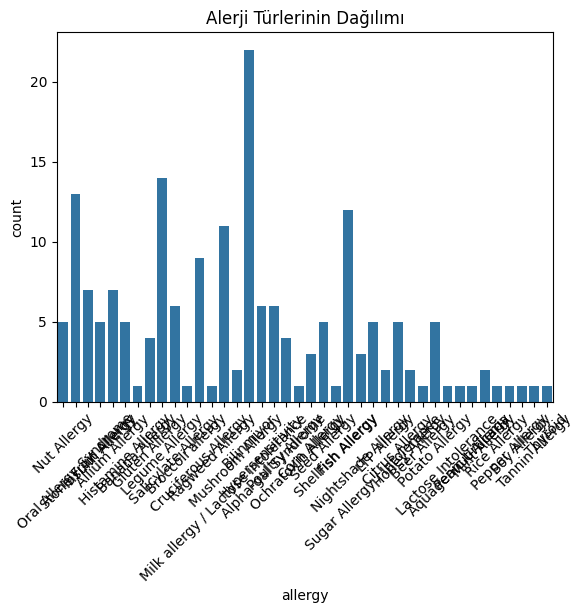

In [ ]:
#Alerjenler görselleştirildi.
sns.countplot(x='allergy', data=df)
plt.title('Alerji Türlerinin Dağılımı')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("\Veri kümesi özet istatistikleri :")
print(df.describe())

\Veri kümesi özet istatistikleri :
               class       type                  group  food     allergy
count            184        184                    184   184         184
unique             3         14                     33   183          40
top     Plant origin  Vegetable  Cruciferous vegetable  Peas  Bilinmiyor
freq             146         64                     15     2          22


In [119]:
#Senaryoda belirli bir alerjenin varlığı kontrol edilecek.
#Hedef değişken oluşturuldu.
df['contains_gluten'] = df['allergy'].fillna("").apply(lambda x: 1 if 'Gluten' in str(x) else 0)

In [120]:
#Kategorik değişkenler sayısallaştırıldı
df = pd.get_dummies(df, drop_first=True)

#Verileri standartlaştırma
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [121]:
#Bağımlı değişken
y = df['contains_gluten']

#Bağımsız değişkenler
X = df_scaled.drop(['contains_gluten', 'allergy'], axis=1, errors='ignore')

In [122]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

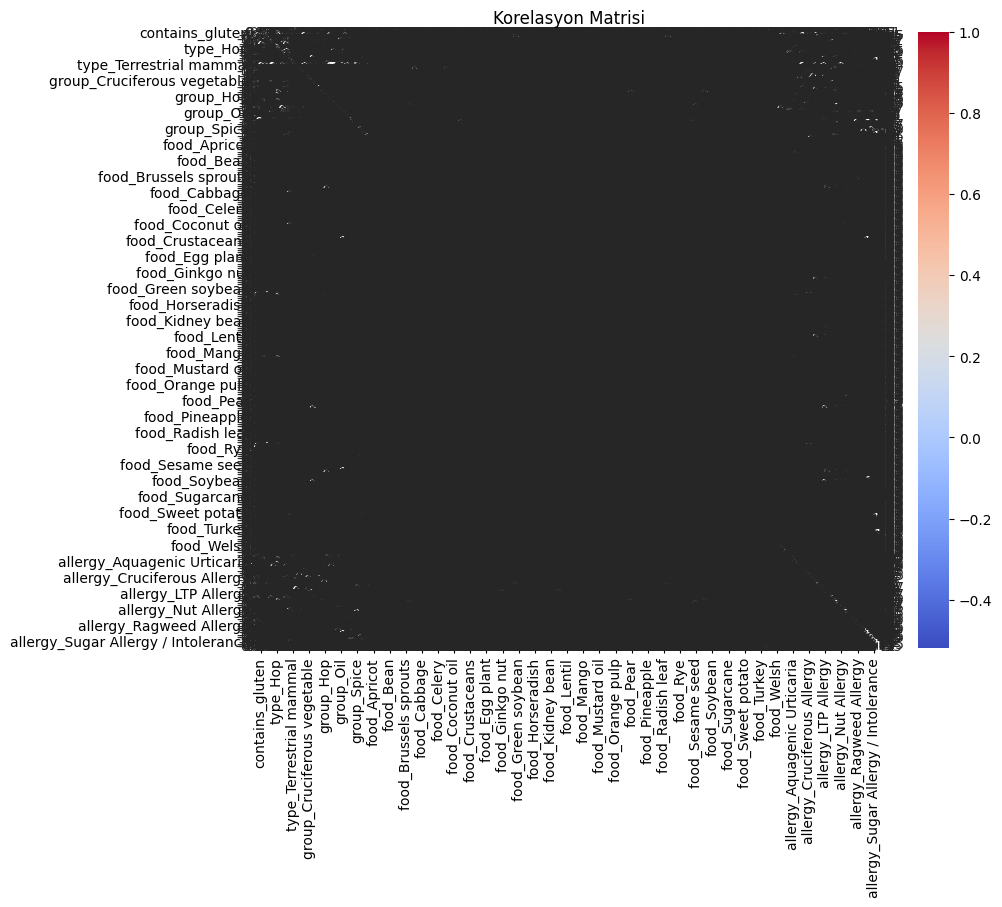

In [ ]:
#Korelasyon matrisi
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(df_scaled).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

In [ ]:
#Model oluşturuldu
model = RandomForestClassifier(random_state=42)
#Model eğitildi
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Değerlendirildi
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))
print("\n Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Doğruluk Skoru: 1.0

 Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

